In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the Excel sheet
df = pd.read_excel('Annotation_Zebrafish_full_with_test.xlsx')

# Filter the rows where Curved_2 has values
filtered_df = df[df['Curved_2'].notna()]

# Display the filtered dataframe
filtered_df = filtered_df[df['Curved_2']!='NAW']
filtered_df

C:\Users\ma405l\AppData\Local\Temp\ipykernel_15068\1474475639.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[df['Curved_2']!='NAW']


,Sample,Fish_Num,Edema,Curved,Additional,Test_Num,Edema_2,Curved_2,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
2,1,3,2,4,-4,1.0,2.0,3,NaN,0.0,0.0,NaN,NaN,NaN
3,1,4,3,3,NaN,2.0,2.0,2,NaN,0.0,1.0,NaN,Curved inter acc,Edema inter acc
10,1,11,3,2,NaN,3.0,3.0,2,NaN,1.0,1.0,NaN,71,83
17,1,18,3,3,NaN,4.0,2.0,3,NaN,1.0,1.0,NaN,NaN,NaN
19,1,20,2,2,NaN,5.0,2.0,2,NaN,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,26,24,2,3,3,96.0,2.0,3,NaN,1.0,0.0,NaN,NaN,NaN
645,27,6,2,3,NaN,97.0,2.0,3,NaN,1.0,1.0,NaN,NaN,NaN
648,27,9,2,1,NaN,98.0,2.0,1,NaN,1.0,1.0,NaN,NaN,NaN
652,27,13,2,3,23,99.0,2.0,2,NaN,0.0,0.0,NaN,NaN,NaN


Accuracy: 0.7244897959183674
F1 Score: 0.723566679853161


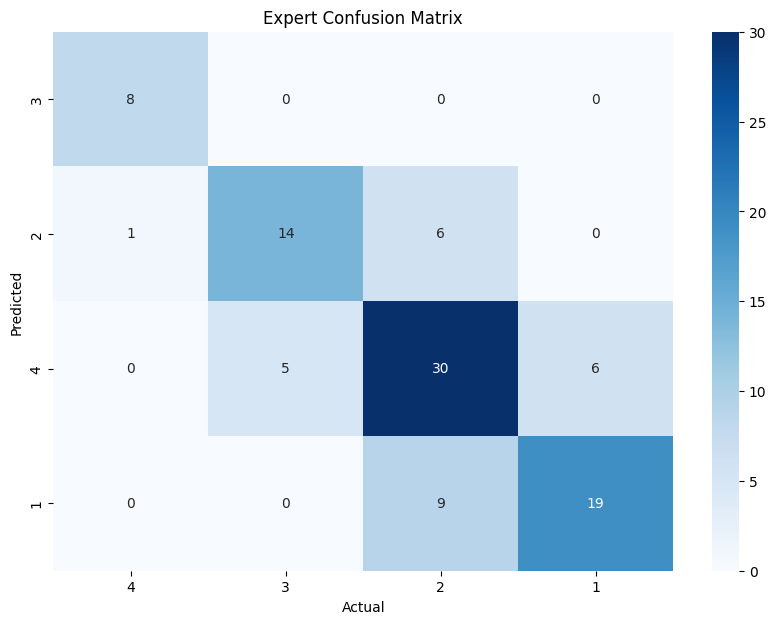

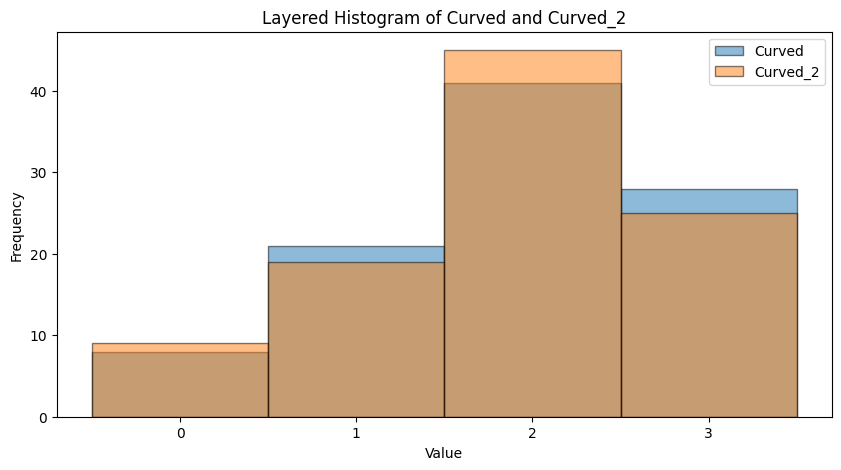

Jensen-Shannon Divergence: 0.06430525584171144


In [8]:
from scipy.spatial.distance import jensenshannon

# Ensure the columns are of the same type
filtered_df['Curved'] = filtered_df['Curved'].astype(str)
filtered_df['Curved_2'] = filtered_df['Curved_2'].astype(str)

# Calculate accuracy
accuracy = accuracy_score(filtered_df['Curved'], filtered_df['Curved_2'])
print(f'Accuracy: {accuracy}')

# Calculate F1 score
f1 = f1_score(filtered_df['Curved'], filtered_df['Curved_2'], average='weighted')
print(f'F1 Score: {f1}')

conf_matrix = confusion_matrix(filtered_df['Curved'], filtered_df['Curved_2'])
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_df['Curved'].unique(), yticklabels=filtered_df['Curved_2'].unique())
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Expert Confusion Matrix')
plt.show()

# Plot layered histograms of 'Curved' and 'Curved_2'
plt.figure(figsize=(10, 5))
plt.hist(filtered_df['Curved'].astype(int) - 1, bins=np.arange(5) - 0.5, edgecolor='black', alpha=0.5, label='Curved')
plt.hist(filtered_df['Curved_2'].astype(int) - 1, bins=np.arange(5) - 0.5, edgecolor='black', alpha=0.5, label='Curved_2')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.title('Layered Histogram of Curved and Curved_2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate the Jensen-Shannon divergence
js_divergence = jensenshannon(np.asarray(filtered_df['Curved'].astype(int)), np.asarray(filtered_df['Curved_2'].astype(int)))
print(f'Jensen-Shannon Divergence: {js_divergence}')